# Ch `13`: Concept `02`

Import the Required libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

Read the MNIST files

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Set up the parameters for training

In [3]:
n_visible      = 784
n_hidden    = 500
display_step = 1
num_epochs = 200
batch_size = 256
lr         = tf.constant(0.001, tf.float32)
learning_rate_train = tf.constant(0.01, tf.float32)
n_classes = 10
training_iters = 200

Define the tensorflow variables for weights and biases as well as placeholder for input

In [4]:
x  = tf.placeholder(tf.float32, [None, n_visible], name="x")
y  = tf.placeholder(tf.float32, [None,10], name="y")
W  = tf.Variable(tf.random_normal([n_visible, n_hidden], 0.01), name="W")
b_h = tf.Variable(tf.zeros([1, n_hidden],  tf.float32, name="b_h"))
b_v = tf.Variable(tf.zeros([1, n_visible],  tf.float32, name="b_v"))
W_f = tf.Variable(tf.random_normal([n_hidden,n_classes], 0.01), name="W_f")
b_f = tf.Variable(tf.zeros([1, n_classes],  tf.float32, name="b_f"))

Converts the probability into discrete binary states i.e. 0 and 1

In [5]:
def sample(probs):
    return tf.floor(probs + tf.random_uniform(tf.shape(probs), 0, 1))

Gibbs sampling step

In [6]:
def gibbs_step(x_k):
    h_k = sample(tf.sigmoid(tf.matmul(x_k, W) + b_h))
    x_k = sample(tf.sigmoid(tf.matmul(h_k, tf.transpose(W)) + b_v))
    return x_k

Run multiple Gibbs Sampling steps starting from an initial point

In [7]:
def gibbs_sample(k,x_k):
    for i in range(k):
        x_out = gibbs_step(x_k)
    # Returns the gibbs sample after k iterations
    return x_out

Contrastive Divergence algorithm

In [9]:
# 1. Through Gibbs sampling locate a new visible state x_sample based on the current visible state x
# 2. Based on the new x sample a new h as h_sample
x_s = gibbs_sample(2,x)
h_s = sample(tf.sigmoid(tf.matmul(x_s, W) + b_h))

# Sample hidden states based given visible states
h = sample(tf.sigmoid(tf.matmul(x, W) + b_h))

# Sample visible states based given hidden states
x_ = sample(tf.sigmoid(tf.matmul(h, tf.transpose(W)) + b_v))

# The weight updated based on gradient descent
size_batch = tf.cast(tf.shape(x)[0], tf.float32)
W_add  = tf.multiply(lr/size_batch, tf.subtract(tf.matmul(tf.transpose(x), h), tf.matmul(tf.
transpose(x_s), h_s)))
bv_add = tf.multiply(lr/size_batch, tf.reduce_sum(tf.subtract(x, x_s), 0, True))
bh_add = tf.multiply(lr/size_batch, tf.reduce_sum(tf.subtract(h, h_s), 0, True))
updt = [W.assign_add(W_add), b_v.assign_add(bv_add), b_h.assign_add(bh_add)]

###############################################################
## Ops for the Classification Network
###############################################################
h_out = tf.sigmoid(tf.matmul(x, W) + b_h)
logits = tf.matmul(h_out,W_f) + b_f
prob = tf.nn.softmax(logits)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate_train).minimize(cost)
correct_pred = tf.equal(tf.argmax(logits,1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Ops for the hidden unit activation

Epoch: 0001
Epoch: 0002
Epoch: 0003
Epoch: 0004
Epoch: 0005
Epoch: 0019
Epoch: 0020
Epoch: 0021
Epoch: 0022
Epoch: 0023
Epoch: 0024
Epoch: 0025
Epoch: 0026
Epoch: 0027
Epoch: 0028
Epoch: 0029
Epoch: 0030
Epoch: 0031
Epoch: 0032
Epoch: 0033
Epoch: 0034
Epoch: 0035
Epoch: 0036
Epoch: 0037
Epoch: 0038
Epoch: 0039
Epoch: 0040
Epoch: 0041
Epoch: 0042
Epoch: 0043
Epoch: 0044
Epoch: 0045
Epoch: 0046
Epoch: 0047
Epoch: 0048
Epoch: 0049
Epoch: 0050
Epoch: 0051
Epoch: 0052
Epoch: 0053
Epoch: 0054
Epoch: 0055
Epoch: 0056
Epoch: 0057
Epoch: 0058
Epoch: 0059
Epoch: 0060
Epoch: 0061
Epoch: 0062
Epoch: 0063
Epoch: 0064
Epoch: 0065
Epoch: 0066
Epoch: 0067
Epoch: 0068
Epoch: 0069
Epoch: 0070
Epoch: 0071
Epoch: 0072
Epoch: 0073
Epoch: 0074
Epoch: 0075
Epoch: 0076
Epoch: 0077
Epoch: 0078
Epoch: 0079
Epoch: 0080
Epoch: 0081
Epoch: 0082
Epoch: 0083
Epoch: 0084
Epoch: 0085
Epoch: 0086
Epoch: 0087
Epoch: 0088
Epoch: 0089
Epoch: 0090
Epoch: 0091
Epoch: 0092
Epoch: 0093
Epoch: 0094
Epoch: 0095
Epoch: 0096
Epoc

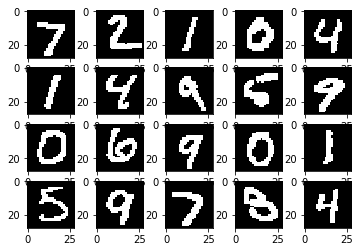

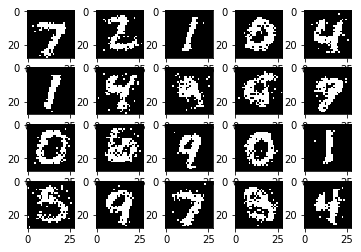

In [11]:
# TensorFlow graph execution
with tf.Session() as sess:
    # Initialize the variables of the Model
    init = tf.global_variables_initializer()
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    # Start the training
    for epoch in range(num_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run the weight update
            batch_xs = (batch_xs > 0)*1
            _ = sess.run([updt], feed_dict={x:batch_xs})
        # Display the running step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1))
    print("RBM training Completed !")
    out = sess.run(h,feed_dict={x:(mnist.test.images[:20]> 0)*1})
    label = mnist.test.labels[:20]
    
    plt.figure(1)
    for k in range(20):
        plt.subplot(4, 5, k+1)
        image = (mnist.test.images[k]> 0)*1
        image = np.reshape(image,(28,28))
        plt.imshow(image,cmap='gray')
        
    plt.figure(2)
    
    for k in range(20):
        plt.subplot(4, 5, k+1)
        image = sess.run(x_,feed_dict={h:np.reshape(out[k],(-1,n_hidden))})
        image = np.reshape(image,(28,28))
        plt.imshow(image,cmap='gray')
        print(np.argmax(label[k]))
        
    ####################################################
    ### Invoke the Classification Network training now
    ####################################################
    for i in range(training_iters):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        if i % 10 == 0:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x, y: batch_y})
            print("Iter " + str(i) + ", Minibatch Loss= " + \
                   "{:.6f}".format(loss) + ", Training Accuracy= " + \
                   "{:.5f}".format(acc))
            
    print("Optimization Finished!")
    # Calculate accuracy for 256 mnist test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: mnist.test.images[:256],
                                      y: mnist.test.labels[:256]}))
    sess.close()